In [1]:
# we'll import these three packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# pandas

## Importing Data

Usually tabular data is stored in csv files
- **C**omma **S**eparated **V**alues
- Can export Excel data as a csv file!

In [32]:
# read in a csv file using pandas
df = pd.read_csv('/content/drive/MyDrive/2022_Spring_USF_PMS_Biotechnology/Notebooks/data/marathon_results_2015.csv')
#df = pd.read_csv('data/marathon_results_2015.csv')

In [5]:
# Who's that object???

type(df)

# It's a DataFrame!

pandas.core.frame.DataFrame

In [6]:
# Jupyter (and other software that reads ipynb files) displays a df nicely
df

Unnamed: 0    Bib                   Name  ...  Overall Gender Division
0               0      3         Desisa, Lelisa  ...        1      1        1
1               1      4  Tsegay, Yemane Adhane  ...        2      2        2
2               2      8         Chebet, Wilson  ...        3      3        3
3               3     11       Kipyego, Bernard  ...        4      4        4
4               4     10          Korir, Wesley  ...        5      5        5
...           ...    ...                    ...  ...      ...    ...      ...
26593       26593  25656  Prescott, Francine J.  ...    26594  12015      269
26594       26594  31359    Emerson, Annette C.  ...    26595  12016      270
26595       26595  25559          Cerveny, Nona  ...    26596  12017       91
26596       26596  29396    Buccilli, Alfred P.  ...    26597  14580     2055
26597       26597  25651        Reilly, William  ...    26598  14581      898

[26598 rows x 25 columns]

In [7]:
# let's import a dataframe from the seaborn package
import seaborn as sns

df = sns.load_dataset('diamonds')

# if you don't have seaborn you can use the following command to pull in the same data
#df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

# see the first few rows
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [8]:
# see the last few rows
df.tail()

carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

In [9]:
# Just one!
df.head(1)

carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43

In [10]:
# let's learn some more about this data
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=53940, step=1)

In [12]:
len(df)

53940

In [13]:
df.shape

(53940, 10)

In [14]:
df.describe()

carat         depth  ...             y             z
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean       0.797940     61.749405  ...      5.734526      3.538734
std        0.474011      1.432621  ...      1.142135      0.705699
min        0.200000     43.000000  ...      0.000000      0.000000
25%        0.400000     61.000000  ...      4.720000      2.910000
50%        0.700000     61.800000  ...      5.710000      3.530000
75%        1.040000     62.500000  ...      6.540000      4.040000
max        5.010000     79.000000  ...     58.900000     31.800000

[8 rows x 7 columns]

In [15]:
# what datatype is each column?
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [16]:
# we can create a dataframe from scratch in multiple ways

# here's a dictionary where the dictionary keys are the column names
# and the dictionary values are the column values

# what do you notice here about the output?
pd.DataFrame({
                "A": 1.0,
                "B": pd.Timestamp("20130102"),
                "C": pd.Series(1, index=list(range(4)), dtype="float32"),
                "D": np.array([3] * 4, dtype="int32"),
                "E": pd.Categorical(["test", "train", "test", "train"]),
                "F": "foo",
                })

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [17]:
# here's my favorite way

# a list of rows
rows = []

colors = ['red', 'blue', 'green']

for idx in range(5):
    new_dict = dict()
    new_dict['Student_Id'] = idx
    new_dict['Student Name'] = f'John{idx}'
    new_dict['Favorite Color'] = colors[idx % 3]
    
    # each row is a dictionary where the keys are the column names
    # and the values are the row values
    rows.append(new_dict)
    
pd.DataFrame(rows)

Student_Id Student Name Favorite Color
0           0        John0            red
1           1        John1           blue
2           2        John2          green
3           3        John3            red
4           4        John4           blue

## Selecting data from a DataFrame

In [18]:
# select a column
df['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [19]:
type(df['carat'])

pandas.core.series.Series

In [20]:
# can slice like a list
df[4:10]

carat        cut color clarity  depth  table  price     x     y     z
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7   0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8   0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9   0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39

In [21]:
# Use loc to get an individual rows/values
df.loc[10]

carat       0.3
cut        Good
color         J
clarity     SI1
depth        64
table        55
price       339
x          4.25
y          4.28
z          2.73
Name: 10, dtype: object

In [22]:
df.loc[10, 'carat']

0.3

In [23]:
# can pass lists to loc
df.loc[[1, 3, 5]]

carat        cut color clarity  depth  table  price     x     y     z
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48

In [24]:
df.loc[[1, 3,5], ['carat', 'cut']]

carat        cut
1   0.21    Premium
3   0.29    Premium
5   0.24  Very Good

In [25]:
# can also use to slice
df.loc[10:15]

carat      cut color clarity  depth  table  price     x     y     z
10   0.30     Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11   0.23    Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
12   0.22  Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
13   0.31    Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
14   0.20  Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
15   0.32  Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68

In [26]:
# the method .iloc uses position
df.iloc[10:15, 0:3]

carat      cut color
10   0.30     Good     J
11   0.23    Ideal     J
12   0.22  Premium     F
13   0.31    Ideal     J
14   0.20  Premium     E

In [27]:
small_df = df.iloc[5:20]
# remember that these methods don't alter "df", but output a new DataFrame object
small_df

carat        cut color clarity  depth  table  price     x     y     z
5    0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
6    0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53
8    0.22       Fair     E     VS2   65.1   61.0    337  3.87  3.78  2.49
9    0.23  Very Good     H     VS1   59.4   61.0    338  4.00  4.05  2.39
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73
11   0.23      Ideal     J     VS1   62.8   56.0    340  3.93  3.90  2.46
12   0.22    Premium     F     SI1   60.4   61.0    342  3.88  3.84  2.33
13   0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71
14   0.20    Premium     E     SI2   60.2   62.0    345  3.79  3.75  2.27
15   0.32    Premium     E      I1   60.9   58.0    345  4.38  4.42  2.68
16   0.30      Ideal     I     SI2   62.0   54.0    348  4.31  4.34  2.68
17   0.30       Good     J     SI1   63.4   54.0    351  4.23  4.29  2.70
18   0.30       Good     J     SI1   63.8   56.0    351  4.23  4.26  2.71
19   0.30  Very Good     J     SI1   62.7   59.0    351  4.21  4.27  2.66

What is the difference between ```.loc[5]``` and ```.iloc[5]``` using ```small_df```? Why?

In [28]:
# Boolean indexing
df[ df['carat'] > 1.5]

carat        cut color clarity  depth  table  price     x     y     z
2024    1.52       Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
2025    1.52       Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
3926    1.51       Good     G      I1   64.0   59.0   3497  7.29  7.17  4.63
3955    1.52       Fair     H      I1   64.9   58.0   3504  7.18  7.13  4.65
4128    1.52    Premium     I      I1   61.2   58.0   3541  7.43  7.35  4.52
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
27745   2.00  Very Good     H     SI1   62.8   57.0  18803  7.95  8.00  5.01
27746   2.07      Ideal     G     SI2   62.5   55.0  18804  8.20  8.13  5.11
27747   1.51      Ideal     G      IF   61.7   55.0  18806  7.37  7.41  4.56
27748   2.00  Very Good     G     SI1   63.5   56.0  18818  7.90  7.97  5.04
27749   2.29    Premium     I     VS2   60.8   60.0  18823  8.50  8.47  5.16

[5442 rows x 10 columns]

In [29]:
# what is going on here?
df['carat'] > 1.5

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: carat, Length: 53940, dtype: bool

This outputs a series of True/False values the same length as the DataFrame.
- Look at ```small_df```
- Print out ```small_df['color' == 'I']```
- Think about why ```small_df[small_df['color' == 'I']``` outputs a DataFrame with rows where the color is labelled ```I```.

## Exploration

In [33]:
#df = pd.read_csv('data/marathon_results_2015.csv')
df

Unnamed: 0    Bib                   Name  ...  Overall Gender Division
0               0      3         Desisa, Lelisa  ...        1      1        1
1               1      4  Tsegay, Yemane Adhane  ...        2      2        2
2               2      8         Chebet, Wilson  ...        3      3        3
3               3     11       Kipyego, Bernard  ...        4      4        4
4               4     10          Korir, Wesley  ...        5      5        5
...           ...    ...                    ...  ...      ...    ...      ...
26593       26593  25656  Prescott, Francine J.  ...    26594  12015      269
26594       26594  31359    Emerson, Annette C.  ...    26595  12016      270
26595       26595  25559          Cerveny, Nona  ...    26596  12017       91
26596       26596  29396    Buccilli, Alfred P.  ...    26597  14580     2055
26597       26597  25651        Reilly, William  ...    26598  14581      898

[26598 rows x 25 columns]

In [34]:
# is a value missing?
pd.isna(df.loc[0:10, ['Name']])

Name
0   False
1   False
2   False
3   False
4   False
5   False
6   False
7   False
8   False
9   False
10  False

In [35]:
# apply to whole dataframe
df.isna()

Unnamed: 0    Bib   Name  ...  Overall  Gender  Division
0           False  False  False  ...    False   False     False
1           False  False  False  ...    False   False     False
2           False  False  False  ...    False   False     False
3           False  False  False  ...    False   False     False
4           False  False  False  ...    False   False     False
...           ...    ...    ...  ...      ...     ...       ...
26593       False  False  False  ...    False   False     False
26594       False  False  False  ...    False   False     False
26595       False  False  False  ...    False   False     False
26596       False  False  False  ...    False   False     False
26597       False  False  False  ...    False   False     False

[26598 rows x 25 columns]

In [37]:
# sum each column
# remember that F = 0, T = 1
# what does the output mean?
df.isna().sum()

Unnamed: 0           0
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             2551
Country              0
Citizen          25534
Unnamed: 9       26531
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

In [ ]:
# drop rows with missing values
df.dropna(axis=0)

In [39]:
# drop columns with missing values
df.dropna(axis=1)

Unnamed: 0    Bib                   Name  ...  Overall Gender Division
0               0      3         Desisa, Lelisa  ...        1      1        1
1               1      4  Tsegay, Yemane Adhane  ...        2      2        2
2               2      8         Chebet, Wilson  ...        3      3        3
3               3     11       Kipyego, Bernard  ...        4      4        4
4               4     10          Korir, Wesley  ...        5      5        5
...           ...    ...                    ...  ...      ...    ...      ...
26593       26593  25656  Prescott, Francine J.  ...    26594  12015      269
26594       26594  31359    Emerson, Annette C.  ...    26595  12016      270
26595       26595  25559          Cerveny, Nona  ...    26596  12017       91
26596       26596  29396    Buccilli, Alfred P.  ...    26597  14580     2055
26597       26597  25651        Reilly, William  ...    26598  14581      898

[26598 rows x 22 columns]

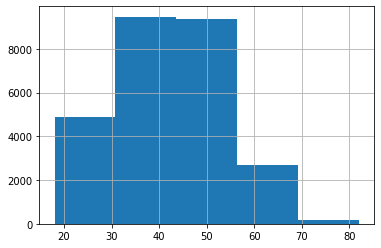

In [40]:
# nice built-in plotting functions
df['Age'].hist(bins=5)

In [41]:
# transform the data
df['M/F'].value_counts()

M    14581
F    12017
Name: M/F, dtype: int64

In [42]:
# mean of the Age, grouped by Country
df[['Country','Age']].groupby('Country').mean()

Age
Country           
AHO      57.000000
AND      48.000000
ARG      46.294118
AUS      44.613636
AUT      47.857143
...            ...
URU      25.000000
USA      41.317185
VEN      42.428571
VGB      36.000000
VIE      35.000000

[79 rows x 1 columns]

In [43]:
df[['Country','Age']].groupby('Country', as_index=False).mean()

Country        Age
0      AHO  57.000000
1      AND  48.000000
2      ARG  46.294118
3      AUS  44.613636
4      AUT  47.857143
..     ...        ...
74     URU  25.000000
75     USA  41.317185
76     VEN  42.428571
77     VGB  36.000000
78     VIE  35.000000

[79 rows x 2 columns]

In [44]:
# if I now want to manipulate this dataframe I need to assign it to a variable name
age_avg = df[['Country','Age']].groupby('Country', as_index=False).mean()

In [45]:
# sort by average age!
age_avg.sort_values(by='Age')

Country        Age
74     URU  25.000000
25     ETH  25.857143
8      BLR  27.000000
24     EST  29.500000
41     KEN  30.666667
..     ...        ...
70     TUR  51.333333
66     SVK  51.500000
40     JPN  53.691176
0      AHO  57.000000
59     QAT  64.000000

[79 rows x 2 columns]

## Lab 1 Part 1: Pandas

Check out the penguins dataset for the following 5 questions.

``` df = sns.load_dataset('penguins')```

``` df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')```


1. What are the variables in this dataset? Which are categorical? Which are continuous? Discrete? (Use pandas commands to answer these questions!)
2. Which columns have missing values? How many?
3. Create a new column giving the body mass in *pounds*. (Hint: you may need to use Google!)
4. How many species types are there? How many penguins are there for each species type?
5. Which species type, on average, weighs more? Does there seem to be a difference between male and female weight?
6. Sort the penguins by bill length.
7. Create a dataframe of only penguins of species "Adelie".
8. Generate a hypothesis about the data, then answer it! (see Q4 above for example)

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

In [68]:
df

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    MALE
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  FEMALE
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  FEMALE
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  FEMALE
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  FEMALE
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    MALE
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  FEMALE
343  Gentoo     Biscoe            49.9  ...              213.0       5400.0    MALE

[344 rows x 7 columns]

In [69]:
# 1. What are the variables in this dataset? 
# Which are categorical? (one that has two or more categories)
# Which are continuous? (numeric variables that have an infinite number of values between any two values)
# Discrete? (Use pandas commands to answer these questions!) (a variable whose value is obtained by counting)
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
# Categorical variables are species, island, and sex.
# Continuous variables are bill_length_mm,	bill_depth_mm,	flipper_length_mm, and	body_mass_g
# Discrete variables are ??????????????????????????????

In [70]:
df.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000

In [73]:
# 2. Which columns have missing values? How many?
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [76]:
# 3. Create a new column giving the body mass in pounds. (Hint: you may need to use Google!)
df['body_mass_lbs'] = df['body_mass_g'] * 0.002205 
df

species     island  bill_length_mm  ...  body_mass_g     sex  body_mass_lbs
0    Adelie  Torgersen            39.1  ...       3750.0    MALE        8.26875
1    Adelie  Torgersen            39.5  ...       3800.0  FEMALE        8.37900
2    Adelie  Torgersen            40.3  ...       3250.0  FEMALE        7.16625
3    Adelie  Torgersen             NaN  ...          NaN     NaN            NaN
4    Adelie  Torgersen            36.7  ...       3450.0  FEMALE        7.60725
..      ...        ...             ...  ...          ...     ...            ...
339  Gentoo     Biscoe             NaN  ...          NaN     NaN            NaN
340  Gentoo     Biscoe            46.8  ...       4850.0  FEMALE       10.69425
341  Gentoo     Biscoe            50.4  ...       5750.0    MALE       12.67875
342  Gentoo     Biscoe            45.2  ...       5200.0  FEMALE       11.46600
343  Gentoo     Biscoe            49.9  ...       5400.0    MALE       11.90700

[344 rows x 8 columns]

In [77]:
# 4. How many species types are there? How many penguins are there for each species type?
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [103]:
# 5. Which species type, on average, weighs more? Does there seem to be a difference between male and female weight?
body_mass_avg = df[['species', 'sex', 'body_mass_g']].groupby(['species', 'sex'], as_index=False).mean()
body_mass_avg
#body_mass_avg.sort_values(by='body_mass_g', ascending=False)

species     sex  body_mass_g
0     Adelie  FEMALE  3368.835616
1     Adelie    MALE  4043.493151
2  Chinstrap  FEMALE  3527.205882
3  Chinstrap    MALE  3938.970588
4     Gentoo  FEMALE  4679.741379
5     Gentoo    MALE  5484.836066

In [101]:
sex_body_mass_avg = df[['sex', 'body_mass_g']].groupby('sex', as_index=False).mean()
sex_body_mass_avg

sex  body_mass_g
0  FEMALE  3862.272727
1    MALE  4545.684524

In [104]:
# 6. Sort the penguins by bill length.
df.sort_values(by='bill_length_mm')

species     island  bill_length_mm  ...  body_mass_g     sex  body_mass_lbs
142     Adelie      Dream            32.1  ...       3050.0  FEMALE       6.725250
98      Adelie      Dream            33.1  ...       2900.0  FEMALE       6.394500
70      Adelie  Torgersen            33.5  ...       3600.0  FEMALE       7.938000
92      Adelie      Dream            34.0  ...       3400.0  FEMALE       7.497000
8       Adelie  Torgersen            34.1  ...       3475.0     NaN       7.662375
..         ...        ...             ...  ...          ...     ...            ...
321     Gentoo     Biscoe            55.9  ...       5600.0    MALE      12.348000
169  Chinstrap      Dream            58.0  ...       3700.0  FEMALE       8.158500
253     Gentoo     Biscoe            59.6  ...       6050.0    MALE      13.340250
3       Adelie  Torgersen             NaN  ...          NaN     NaN            NaN
339     Gentoo     Biscoe             NaN  ...          NaN     NaN            NaN

[344 rows x 8 columns]

In [106]:
# 7. Create a dataframe of only penguins of species "Adelie".
adelie_df = df.loc[df['species'] == 'Adelie']
adelie_df

species     island  bill_length_mm  ...  body_mass_g     sex  body_mass_lbs
0    Adelie  Torgersen            39.1  ...       3750.0    MALE       8.268750
1    Adelie  Torgersen            39.5  ...       3800.0  FEMALE       8.379000
2    Adelie  Torgersen            40.3  ...       3250.0  FEMALE       7.166250
3    Adelie  Torgersen             NaN  ...          NaN     NaN            NaN
4    Adelie  Torgersen            36.7  ...       3450.0  FEMALE       7.607250
..      ...        ...             ...  ...          ...     ...            ...
147  Adelie      Dream            36.6  ...       3475.0  FEMALE       7.662375
148  Adelie      Dream            36.0  ...       3450.0  FEMALE       7.607250
149  Adelie      Dream            37.8  ...       3750.0    MALE       8.268750
150  Adelie      Dream            36.0  ...       3700.0  FEMALE       8.158500
151  Adelie      Dream            41.5  ...       4000.0    MALE       8.820000

[152 rows x 8 columns]

In [121]:
# 8. Generate a hypothesis about the data, then answer it! (see Q4 above for example)
# How many species are there on each island? 
df['penguin_num'] = 1
island_pinguins = df[['island', 'species', 'sex', 'penguin_num']].groupby(['island', 'species', 'sex'], as_index=False).sum('penguin_num')
island_pinguins

island    species     sex  penguin_num
0     Biscoe     Adelie  FEMALE           22
1     Biscoe     Adelie    MALE           22
2     Biscoe     Gentoo  FEMALE           58
3     Biscoe     Gentoo    MALE           61
4      Dream     Adelie  FEMALE           27
5      Dream     Adelie    MALE           28
6      Dream  Chinstrap  FEMALE           34
7      Dream  Chinstrap    MALE           34
8  Torgersen     Adelie  FEMALE           24
9  Torgersen     Adelie    MALE           23

# matplotlib

- Let's start with some np.arrays!

In [48]:
x = np.array([1,2,3,4])
x

array([1, 2, 3, 4])

In [49]:
type(x)

numpy.ndarray

In [50]:
# most useful np.array method!
x.shape

(4,)

In [51]:
x = np.array([[1,2],[3,4],[5,6]])
x.shape

(3, 2)

In [52]:
# What is this doing?
x = np.random.randint(5, size=10)
x

array([3, 4, 2, 0, 0, 1, 0, 3, 0, 3])

In [53]:
# and this?
x = np.random.rand(100)
x

array([0.92131497, 0.72193677, 0.46394325, 0.25461427, 0.33105155,
       0.71878467, 0.512608  , 0.59982725, 0.01626523, 0.22486455,
       0.69351383, 0.60322792, 0.66622176, 0.44096294, 0.26470481,
       0.69763576, 0.45726234, 0.09974401, 0.2795087 , 0.42769798,
       0.89197274, 0.30441753, 0.8736078 , 0.83258064, 0.35365703,
       0.39361975, 0.86422735, 0.86543213, 0.18563639, 0.65824398,
       0.30213953, 0.81668082, 0.98285482, 0.46857115, 0.58407057,
       0.45766289, 0.22583465, 0.72556702, 0.74339297, 0.62248325,
       0.22538396, 0.18133104, 0.78650276, 0.41494705, 0.82652558,
       0.90857644, 0.53824724, 0.32215525, 0.36617506, 0.19852455,
       0.52326346, 0.16355424, 0.14936356, 0.98766109, 0.02153489,
       0.57930328, 0.66327362, 0.46782913, 0.55096209, 0.18608258,
       0.13930481, 0.67140077, 0.70448679, 0.31017249, 0.16248049,
       0.86680811, 0.29070347, 0.59444921, 0.07943851, 0.89135555,
       0.6762    , 0.01021712, 0.82325231, 0.48995313, 0.67710

Now let's do some plotting

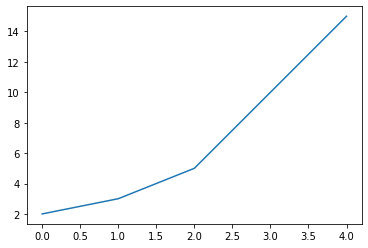

In [54]:
# a simple line chart
plt.plot([0,1,2,3,4], [2,3,5,10,15])

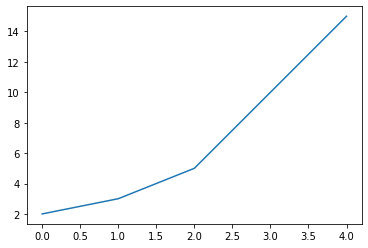

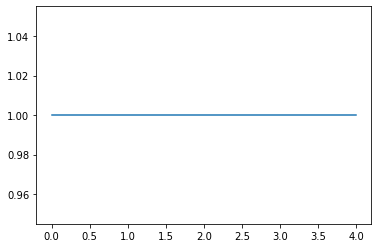

In [55]:
# better to use plt.show rather than "printing" the line chart
plt.plot([0,1,2,3,4], [2,3,5,10,15])
plt.show()
plt.plot([0,1,2,3,4], [1,1,1,1,1])
plt.show()

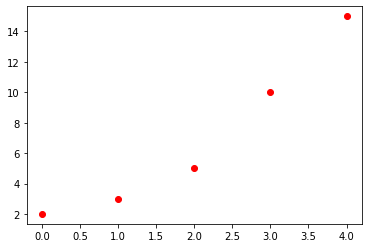

In [155]:
# scatter plot!
plt.plot([0,1,2,3,4], [2,3,5,10,15], 'ro')
plt.show()

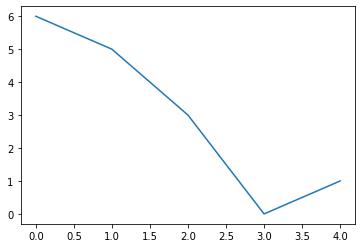

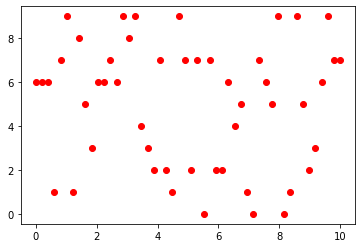

In [156]:
# plt takes in np arrays!
# np.arange(k) makes a sequence of k numbers
plt.plot(np.arange(5), np.random.randint(10, size=5))
plt.show()

start = 0
stop = 10
num_pts = 50
# linspace creates a sequence of points using a start, stop, and number of points option
plt.plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')
plt.show()

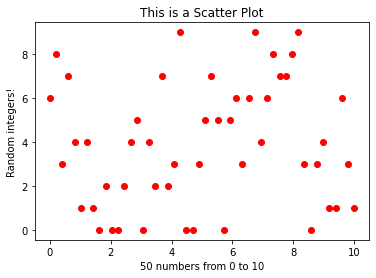

In [154]:
plt.plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')

# easy to format the graph!
plt.xlabel(f'{num_pts} numbers from {start} to {stop}')
plt.ylabel('Random integers!')
plt.title('This is a Scatter Plot')
plt.show()

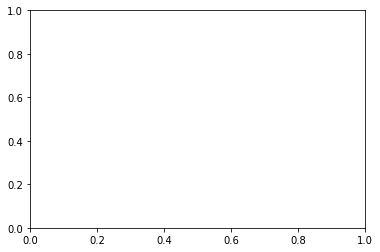

In [59]:
# create a figure and one subplot
fig, ax = plt.subplots()
plt.show()

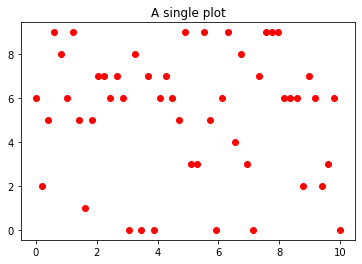

In [149]:
fig, ax = plt.subplots()

# populate the subplot
ax.plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')
ax.set_title('A single plot')

# show it
plt.show()

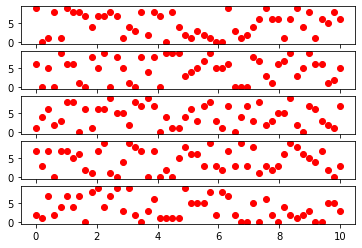

In [61]:
# multiple subplots
fig, axes = plt.subplots(nrows=5, ncols=1)

for idx in range(5):
    axes[idx].plot(np.linspace(start, stop, num_pts), np.random.randint(10, size=50), 'ro')

plt.show()

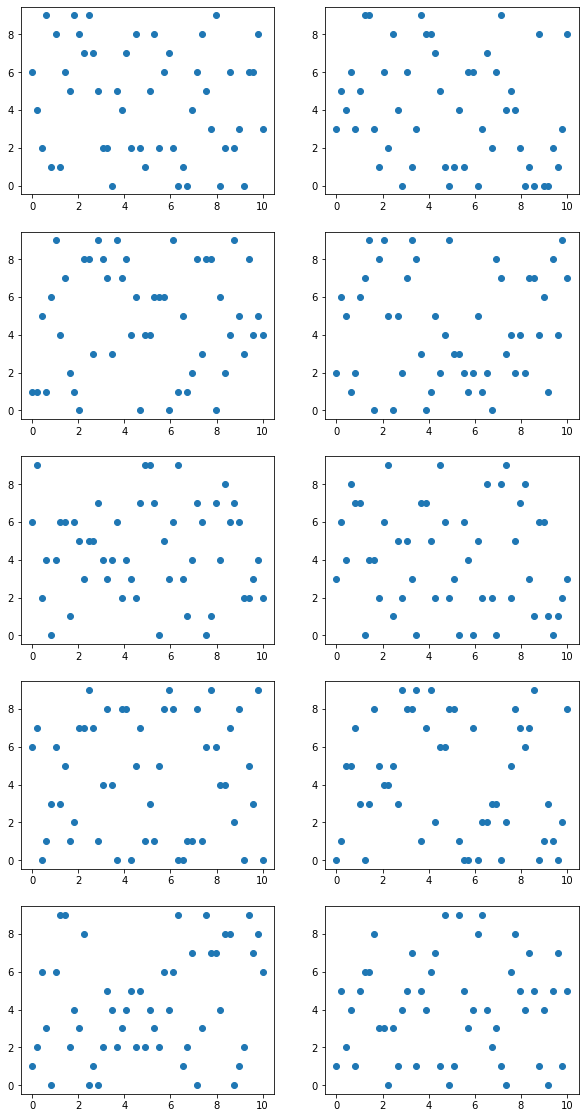

In [62]:
# a little bigger now
# figsize = (width, height)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

for idx in range(5):
    for idx2 in range(2):
        # can use scatter instead of plot too
        axes[idx, idx2].scatter(np.linspace(start, stop, num_pts), np.random.randint(10, size=50))

plt.show()

In [63]:
# let's make some bar graphs
df = sns.load_dataset('diamonds')
color_counts = df['color'].value_counts()
color_counts

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

<BarContainer object of 7 artists>

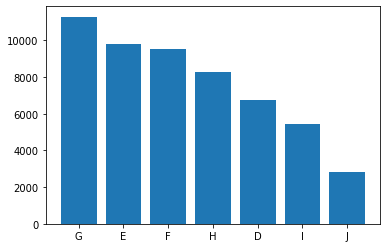

In [64]:
plt.bar(color_counts.index, color_counts.values)

## Lab 1 Part 2: Matplotlib

1. Plot the line ```y=2x``` from ```x=0``` to ```x=30``` using ```plt.plot```.
2. Create a scatter plot where the x values are the first 100 integers in ascending order and the y values are the first 100 integers in descending order.

Use the penguins dataset from Part 1 for the following questions

3. Create *one* figure with four histograms, one for each of the numeric variables.
4. Create a bar chart to answer the questions "How many penguins are there for each species type?"
5. Make the bar chart **horizontal**!
6. Make a scatter plot comparing two of numeric variables. Is there any relationship here?

BONUS: Incorporate a *third* variable by coloring the scatter plot points according to ```island```.

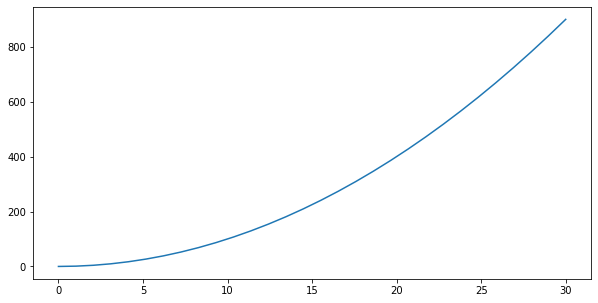

<function matplotlib.pyplot.plot>

In [126]:
# 1. Plot the line y=2x from x=0 to x=30 using plt.plot.
# Creating vectors X and Y
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 30, 30)
y = x ** 2
 
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
 
# Show the plot
plt.show()
plt.plot

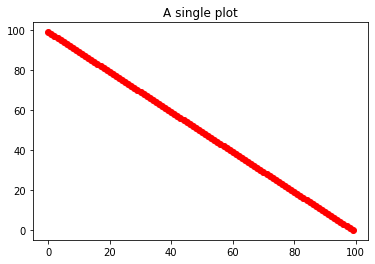

In [166]:
# 2. Create a scatter plot where the x values are the first 100 integers in ascending order and 
# the y values are the first 100 integers in descending order.
y = np.arange(0, 100, 1)
y = sorted(y, reverse=True)

fig, ax = plt.subplots()

# populate the subplot
ax.plot(np.arange(0, 100, 1), y, 'ro')
ax.set_title('A single plot')

# show it
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa69a633d50>,
      dtype=object)

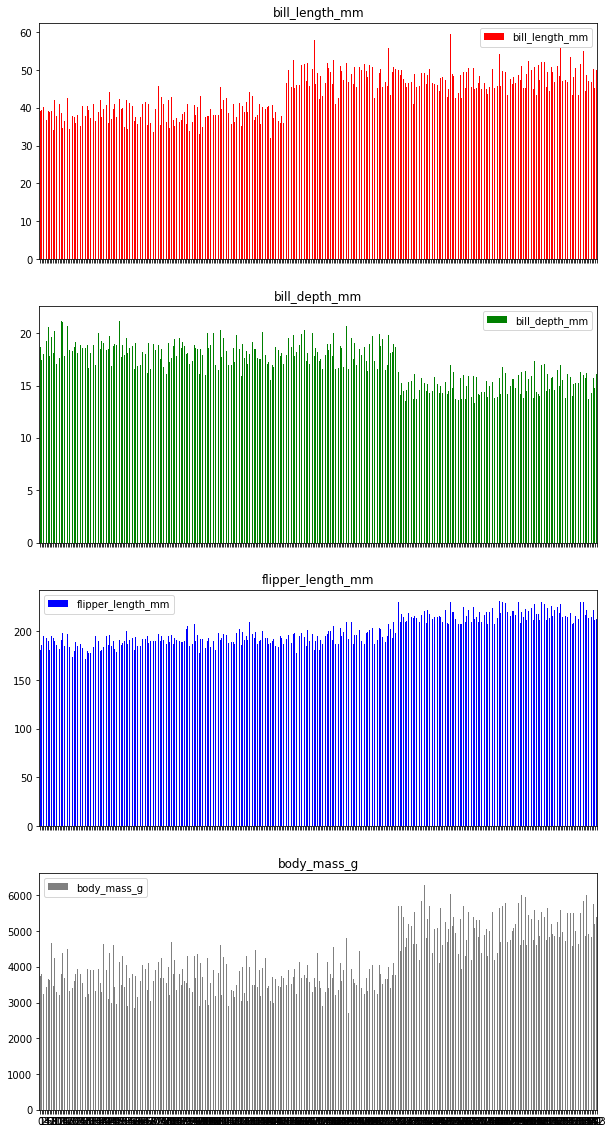

In [185]:
# 3. Create one figure with four histograms, one for each of the numeric 
# variables.
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

df.plot.bar(rot=0, 
            subplots=True,
            color={"bill_length_mm": "red", 
                   "bill_depth_mm": "green",
                   "flipper_length_mm": "blue",
                   "body_mass_g": "grey"},
            figsize=(10,20))

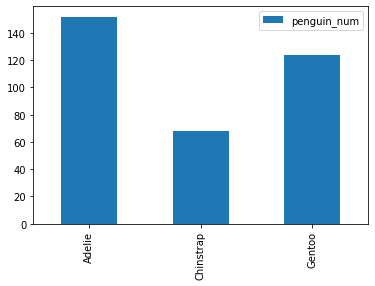

In [210]:
# 4. Create a bar chart to answer the questions 
# "How many penguins are there for each species type?"
df['penguin_num'] = 1
pinguin_species = df[['species', 'penguin_num']].groupby(['species'], as_index=False).sum('penguin_num')
ax = pinguin_species.plot.bar()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Adelie'
labels[1] = 'Chinstrap'
labels[2] = 'Gentoo'
ax.set_xticklabels(labels)
ax

In [194]:
pinguin_species

species  penguin_num
0     Adelie          152
1  Chinstrap           68
2     Gentoo          124

[Text(0, 0, 'Adelie'), Text(0, 0, 'Chinstrap'), Text(0, 0, 'Gentoo')]

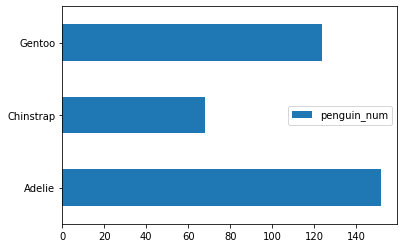

In [211]:
# 5. Make graph horizontal!
pinguin_species = df[['species', 'penguin_num']].groupby(['species'], as_index=False).sum('penguin_num')
ax = pinguin_species.plot.barh()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Adelie'
labels[1] = 'Chinstrap'
labels[2] = 'Gentoo'
ax.set_yticklabels(labels)

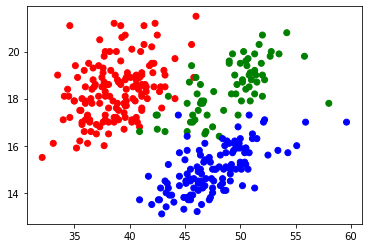

In [249]:
# 6. Make a scatter plot comparing two of numeric variables. Is there any relationship here?
fig, ax = plt.subplots()
colors = {'Adelie':'red', 'Chinstrap':'green', 'Gentoo':'blue'}

# populate the subplot
plt.scatter(df.bill_length_mm, df.bill_depth_mm, c=df['species'].map(colors))

plt.show()

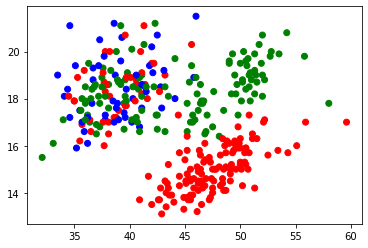

In [252]:
# 7. BONUS: Incorporate a third variable by coloring the scatter plot points according to island
fig, ax = plt.subplots()
colors = {'Biscoe':'red', 'Dream':'green', 'Torgersen':'blue'}

# populate the subplot
plt.scatter(df.bill_length_mm, df.bill_depth_mm, c=df['island'].map(colors))

plt.show()